In [2]:
import os
print(os.environ['PATH'])
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/werikcyano/anaconda3/bin:/home/werikcyano/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


In [11]:
#image = 'coin.jpg'
#image = 'moeda2.jpeg'
#image = 'moeda3.jpeg'
image = 'moeda4.jpeg'
img = cv2.imread(image, 1)

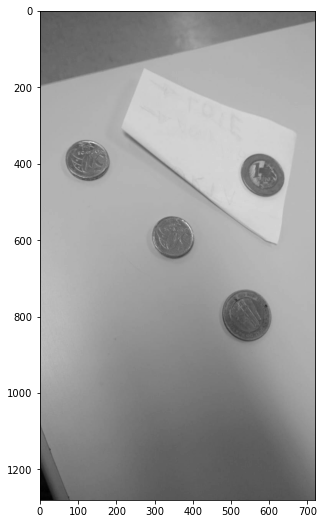

In [12]:
#faz uma cópia
img_org = img.copy()
#Converte para a escala de cinza
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

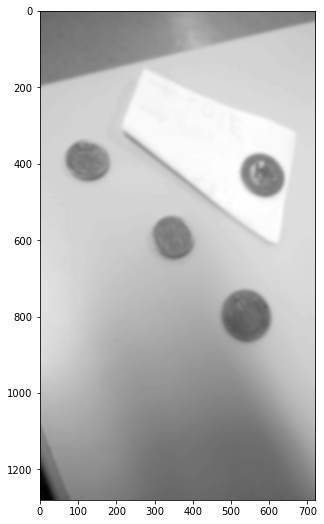

In [13]:
#Blur 
img = cv2.GaussianBlur(img, (31,31), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

In [14]:
#Detectando com o HOUGH CIRCLE TRANSFORM
#parametreos  minDist, minRadius, maxRadius (pode mudar de imagem para imagem)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=90, param1=30, param2=30, minRadius=20, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles)
print(circles.shape)

[[[586 426  61]
  [536 796  64]
  [130 396  50]
  [344 590  52]]]
(1, 4, 3)


In [15]:
circles = np.squeeze(circles)
#circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

[[586 426  61]
 [536 796  64]
 [130 396  50]
 [344 590  52]]
(4, 3)


In [16]:
imagemm = img_org
radius = 100
color = (255, 125, 0)
thickness = 5
print(len(circles.shape))
for i in range(len(circles)):
    if len(circles.shape) > 1:
        coord=circles[i]
        x=coord[0]
        y=coord[1]
        center_coordinates = (x, y)
        imagemm = cv2.circle(imagemm, center_coordinates, radius, color, thickness)
    else:
        coord=circles
        x=coord[0]
        y=coord[1]
        center_coordinates = (x, y)
        imagemm = cv2.circle(imagemm, center_coordinates, radius, color, thickness)
    #print(coord)
    


2


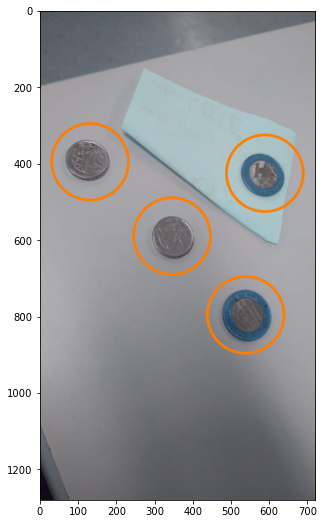

In [17]:
plt.imshow(imagemm)